In [45]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

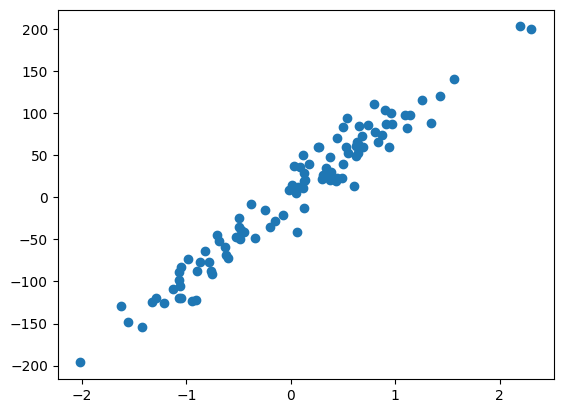

In [46]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
plt.scatter(X,y)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.intercept_

0.18152097481309992

In [48]:
model.coef_

array([93.34092106])

In [86]:
class GDregressor:
    
    def __init__(self, learningrate, epoches):
        self.m = 93.34092106
        self.b = -120
        self.lr = learningrate
        self.epoches = epoches
        

    def fit_(self, X, y):
        for i in range(self.epoches):
            loss_slop = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slop)
            print(loss_slop, self.b)
        print(self.b)

In [87]:
model_1 = GDregressor(learningrate=0.001, epoches=100)

In [88]:
model_1.fit_(X, y)

-24036.304194934433 -95.96369580506557
-19229.043355947546 -76.73465244911802
-15383.234684758034 -61.35141776435998
-12306.58774780643 -49.04483001655355
-9845.270198245142 -39.1995598183084
-7876.216158596113 -31.323343659712286
-6300.9729268768915 -25.022370732835395
-5040.778341501512 -19.981592391333884
-4032.62267320121 -15.948969718132673
-3226.098138560968 -12.722871579571706
-2580.8785108487746 -10.14199306872293
-2064.702808679019 -8.077290260043911
-1651.7622469432154 -6.4255280131006955
-1321.4097975545724 -5.104118215546123
-1057.127838043658 -4.046990377502465
-845.7022704349262 -3.2012881070675387
-676.561816347941 -2.524726290719598
-541.2494530783528 -1.9834768376412453
-432.99956246268215 -1.5504772751785632
-346.39964997014573 -1.2040776252084173
-277.1197199761165 -0.9269579052323008
-221.69577598089322 -0.7052621292514076
-177.35662078471472 -0.5279055084666929
-141.8852966277717 -0.3860202118389212
-113.50823730221734 -0.27251197453670384
-90.80658984177398 -0.181

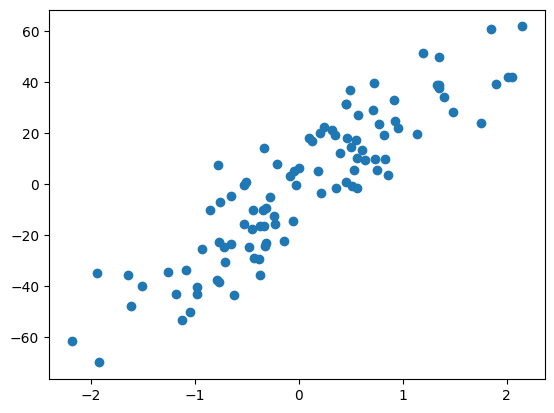

In [90]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, random_state=13)
plt.scatter(X,y)

In [91]:
model = LinearRegression()
model.fit(X, y)
print(f"coefficient : {model.coef_}")
print(f"intercept : {model.intercept_}")

coefficient : [27.7731454]
intercept : -1.721058419007734


In [110]:
class GDregressor_2:
    
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.b = 100
        self.m = -120

    def fit(self, x, y):

        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - (self.m * x.ravel()) - self.b)
            self.b = self.b - (self.lr * loss_slope_b)
            loss_slope_m = -2 * np.sum((y - (self.m * x.ravel()) - self.b)* x.ravel())
            self.m = self.m - (self.lr * loss_slope_m )
        print(f"intercept :  {self.b}")
        print(f"slope/ coefficeient :  {self.m}")
        
    def predict(self, x):
        return self.m * x + self.b

In [111]:
gd = GDregressor_2(0.001, 1000)
gd.fit(X, y)

intercept :  -1.7210584190077343
slope/ coefficeient :  27.773145398831556


In [112]:
gd.predict(X)

array([[-21.50638786],
       [-13.86196827],
       [-14.32318928],
       [ 24.74204468],
       [  4.88500191],
       [ 22.19749029],
       [ -8.47899379],
       [  3.41547235],
       [-21.74548718],
       [-13.66065258],
       [ 54.24796257],
       [  9.3115827 ],
       [  4.05020268],
       [ -8.17625596],
       [-23.06824842],
       [ 10.86458164],
       [ 16.05053221],
       [  8.2642843 ],
       [-46.57768672],
       [ 46.86088815],
       [-23.63376533],
       [-15.93993942],
       [-27.50384762],
       [ 58.0018404 ],
       [ -7.47981174],
       [-47.24383805],
       [-11.12555242],
       [-10.66744558],
       [-15.09025674],
       [-16.25097423],
       [ 18.33018209],
       [ 19.55070051],
       [ 10.87353645],
       [-36.75982377],
       [-62.46412891],
       [-34.64386736],
       [  4.31825814],
       [ 35.22602693],
       [-31.91551081],
       [ 13.8947177 ],
       [-43.73752577],
       [ -1.78740917],
       [ -9.44572879],
       [ 10

In [113]:
from sklearn.model_selection import cross_val_score

In [117]:
cv_score = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"mean cross validation score : {np.mean(cv_score)}")

mean cross validation score : 0.7627539628671631


### lets do it by r2 , train test split

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(f"intercept : {model.intercept_}")
print(f"slope : {model.coef_}")

intercept : -2.034804425193077
slope : [28.02510725]


In [124]:
y_predict = model.predict(x_test)
print(f"r squared : {r2_score(y_test, y_predict)}")

r squared : 0.7493224289814209


In [126]:
class GDregressor:
    
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.b = 100
        self.m = -120

    def fit(self, x, y):

        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - (self.m * x.ravel()) - self.b)
            self.b = self.b - (self.lr * loss_slope_b)
            loss_slope_m = -2 * np.sum((y - (self.m * x.ravel()) - self.b)* x.ravel())
            self.m = self.m - (self.lr * loss_slope_m )
        print(f"intercept :  {self.b}")
        print(f"slope/ coefficeient :  {self.m}")
        
    def predict(self, x):
        return self.m * x + self.b

In [129]:
gd = GDregressor(0.01, 1000)
gd.fit(x_train, y_train)
y_pred = gd.predict(x_test)

intercept :  -2.0348044251930766
slope/ coefficeient :  28.02510725286352


In [130]:
print(r2_score(y_test,y_pred))

0.7493224289814209


In [132]:
for i in range(X.shape[0]):
    slope_b = slope_b - 

100